In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_excel("DAGs Data.xlsx", index_col = [0])
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
list(data.keys())

C:\Users\kodjo.barnor\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
C:\Users\kodjo.barnor\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


['Article Title',
 'Article Link',
 'General Outcome',
 'General Outcome (1,0)',
 'Desc General Outcome',
 'Daily Intake',
 'Descr Daily Intake',
 'Health Outcome',
 'Descr Health Outcome',
 'Environmental Outcome',
 'Descr Environmental Outcome',
 'Fund Source',
 'Fund Source',
 'University',
 'Private',
 'Private & Public',
 'Private & University',
 'Public',
 'Public & International Org',
 'Public & University',
 'University & International Org',
 'International Org',
 'Research Institution',
 'Not Available',
 'Private Affiliation',
 'Public Affiliation',
 'University Affiliation',
 'Institution',
 'Author Affiliation',
 'Loc Authors',
 'Loc Experiment',
 'North America',
 'South America',
 'Europe',
 'Asia',
 'Others',
 'Year',
 'Journal',
 'Loc Journal',
 'Loc Editor Journal',
 'Current Impact Factor',
 'Impact F Publishing Year',
 'Num Citations',
 'International',
 'Research',
 'New Zealand',
 'Switzerland',
 'Netherlands',
 'Belgium',
 'South Africa',
 'Slovak Republic',
 'Gre

In [20]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

,Article Title,Article Link,General Outcome,"General Outcome (1,0)",Desc General Outcome,Daily Intake,Descr Daily Intake,Health Outcome,Descr Health Outcome,Environmental Outcome,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Potential of terracing to reduce glyphosate an...,https://link.springer.com/article/10.1007%2Fs1...,1,1,Found glyphosate in soil and sediment,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,1,0,0
1,Uptake and persistence of the herbicide glyph...,https://cdnsciencepub.com/doi/abs/10.1139/x89-128,1,1,High glyphosate levels above maximum permissib...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,Residues of glyphosate and its metabolite AMPA...,https://cdnsciencepub.com/doi/pdf/10.4141/cjps...,0,0,Accepted seed residues of less than 5.0 mg kg-...,NaN,NaN,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,Glyphosate pathways to modern diseases VI: Pri...,http://www.amsi.ge/jbpc/11717/25SA16A.pdf,1,1,Health risks associated with the indiscrimina...,NaN,NaN,1,"Health risk, presence of glyphosate in many po...",0,...,0,0,0,0,0,1,0,0,0,0
4,A generational study of glyphosate-tolerant so...,https://doi.org/10.1016/j.fct.2003.08.003,0,0,It was concluded that the transgenic soybean ...,NaN,NaN,0,No negative effect,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Effect of glyphosate herbicide on acetylcholin...,https://doi.org/10.1016/j.ecoenv.2005.07.017,1,1,The present study reveals that exposure of L. ...,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
499,Comparative cyto- and genotoxicity assessment ...,https://doi.org/10.1016/j.envres.2019.108851,1,1,the GBHs-induced DNA damage observed in the co...,NaN,NaN,1,the GBHs-induced DNA damage observed in the co...,0,...,0,0,0,0,0,0,0,1,0,0
500,Genotoxic effects of glyphosate on Physalaemus...,https://doi.org/10.1016/j.etap.2020.103516,1,1,Glyphosate herbicide can be considered a genot...,NaN,NaN,1,Glyphosate herbicide can be considered a genot...,0,...,0,0,0,0,0,0,0,0,0,1
501,Ecotoxicological risk assessment for the herbi...,https://doi.org/10.1016/j.envpol.2017.10.100,1,1,Potential adverse effect on aquatic invertebrates,NaN,NaN,0,NaN,1,...,0,0,0,0,0,0,1,0,0,0


In [21]:
### drop Iran due to colinearity
#del years[0]
keys =["General Outcome",
       'Num Citations',
       "Impact F Publishing Year",
      "Private Affiliation",
      "University Affiliation",
      "Public Affiliation",
      "North America",
      "South America",
      "Europe",
      "Asia"]
keys = keys #+ countries
#keys = ["General_outcome", "Year", "Fund_Source", "Loc_experiment", "Journal"]
max_cond_vars = len(keys) - 2
data = data[keys].dropna()
data["Impact F Publishing Year"] = data["Impact F Publishing Year"].astype(float)
data.dtypes

General Outcome               int64
Num Citations               float64
Impact F Publishing Year    float64
Private Affiliation           int64
University Affiliation        int64
Public Affiliation            int64
North America                 int64
South America                 int64
Europe                        int64
Asia                          int64
dtype: object

In [22]:
data

,General Outcome,Num Citations,Impact F Publishing Year,Private Affiliation,University Affiliation,Public Affiliation,North America,South America,Europe,Asia
0,1,1.0,2.790,0,1,0,0,1,0,0
3,1,20.0,2.950,1,0,0,1,0,0,0
4,0,108.0,2.662,0,1,0,1,0,0,0
5,1,29.0,1.559,0,0,1,0,0,1,0
6,0,22.0,1.780,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
498,1,256.0,2.335,0,1,0,0,1,0,0
499,1,5.0,5.715,0,1,0,0,0,1,0
500,1,0.0,3.595,0,1,0,0,1,0,0
501,1,42.0,6.125,0,1,0,0,0,1,0


In [23]:
import pingouin
from pgmpy.estimators import PC
c = PC(data[keys].dropna())
max_cond_vars = len(keys) - 2

sig =0.05
model = c.estimate(return_type = "dag", variant= "parallel", 
                   significance_level = sig, 
                   max_cond_vars = max_cond_vars, ci_test = "pearsonr")
edges = model.edges()
pcorr = data.pcorr()
weights = {}

  0%|          | 0/8 [00:00<?, ?it/s]

In [27]:
pcorr

,General Outcome,Num Citations,Impact F Publishing Year,Private Affiliation,University Affiliation,Public Affiliation,North America,South America,Europe,Asia
General Outcome,1.000000,0.084177,0.144874,-0.167293,-0.006910,-0.108843,-0.148300,0.007206,-0.072170,0.032090
Num Citations,0.084177,1.000000,0.080825,0.086062,0.086996,0.095208,0.064352,0.042347,0.068463,0.007258
Impact F Publishing Year,0.144874,0.080825,1.000000,0.060723,0.065252,0.104807,0.104350,0.049919,0.127456,0.023217
Private Affiliation,-0.167293,0.086062,0.060723,1.000000,-0.352458,-0.315458,0.055078,0.016531,0.012511,0.003508
University Affiliation,-0.006910,0.086996,0.065252,-0.352458,1.000000,-0.602285,-0.008624,0.014806,-0.077140,0.002832
Public Affiliation,-0.108843,0.095208,0.104807,-0.315458,-0.602285,1.000000,0.033461,0.013718,-0.039519,0.097208
North America,-0.148300,0.064352,0.104350,0.055078,-0.008624,0.033461,1.000000,-0.804699,-0.799973,-0.661350
South America,0.007206,0.042347,0.049919,0.016531,0.014806,0.013718,-0.804699,1.000000,-0.838385,-0.711263
Europe,-0.072170,0.068463,0.127456,0.012511,-0.077140,-0.039519,-0.799973,-0.838385,1.000000,-0.670831
Asia,0.032090,0.007258,0.023217,0.003508,0.002832,0.097208,-0.661350,-0.711263,-0.670831,1.000000


In [24]:
undirected_graph = {key:[] for key in data.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in data.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

undirected_graph

{'General Outcome': ['Num Citations',
  'Impact F Publishing Year',
  'Private Affiliation',
  'University Affiliation',
  'Public Affiliation',
  'North America',
  'South America',
  'Europe',
  'Asia'],
 'Num Citations': ['General Outcome',
  'Impact F Publishing Year',
  'Private Affiliation',
  'University Affiliation',
  'Public Affiliation',
  'North America',
  'South America',
  'Europe',
  'Asia'],
 'Impact F Publishing Year': ['General Outcome',
  'Num Citations',
  'Private Affiliation',
  'University Affiliation',
  'Public Affiliation',
  'North America',
  'South America',
  'Europe',
  'Asia'],
 'Private Affiliation': ['General Outcome',
  'Num Citations',
  'Impact F Publishing Year',
  'University Affiliation',
  'Public Affiliation',
  'North America',
  'South America',
  'Europe',
  'Asia'],
 'University Affiliation': ['General Outcome',
  'Num Citations',
  'Impact F Publishing Year',
  'Private Affiliation',
  'Public Affiliation',
  'North America',
  'South Ame

OutEdgeView([('University Affiliation', 'South America'), ('Num Citations', 'Impact F Publishing Year'), ('Private Affiliation', 'North America')])

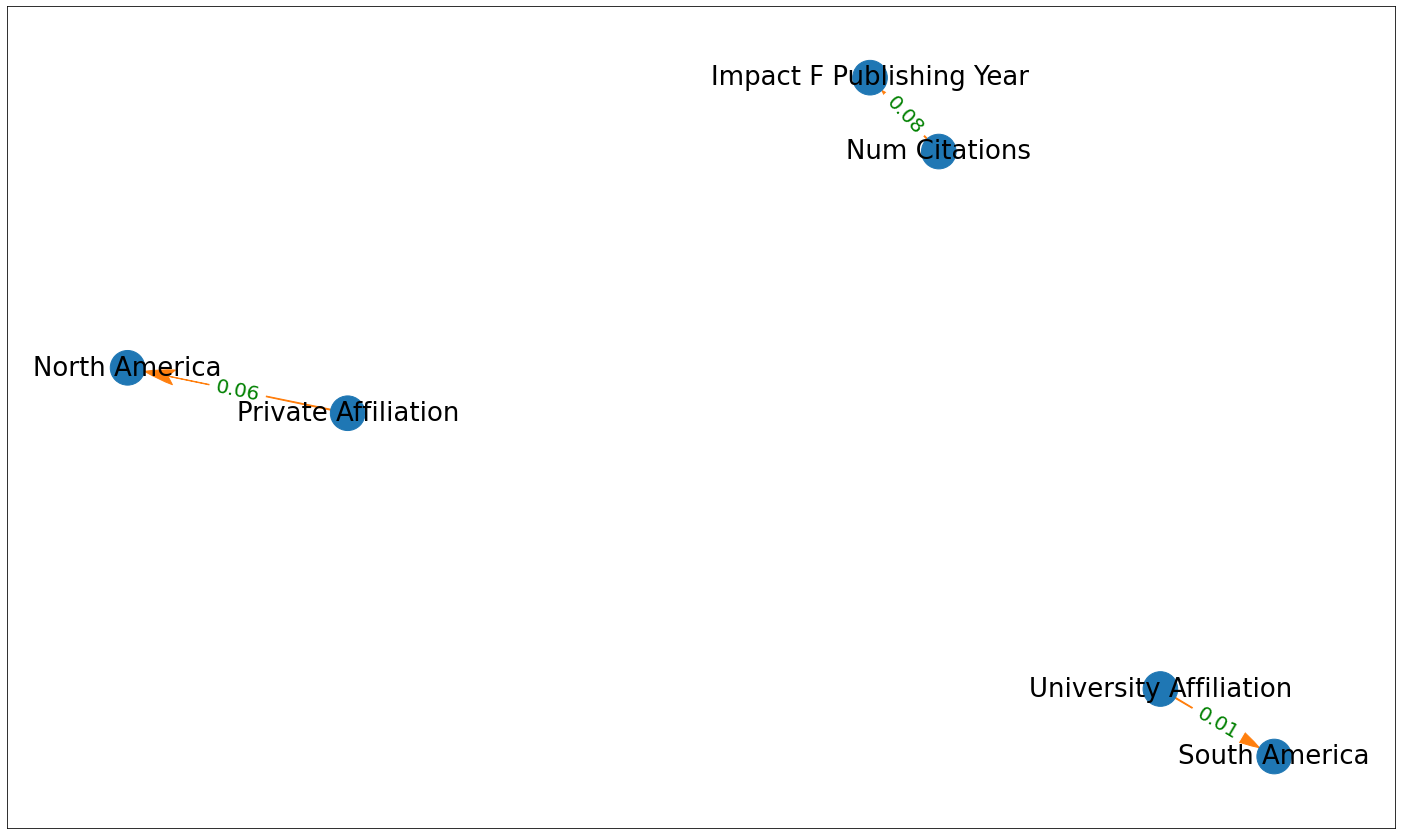

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import networkx as nx
def graph_DAG(edges, data, title = ""):
    pcorr = data.pcorr()
    graph = nx.DiGraph()
    edge_labels = {}
    for edge in edges:
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]],2))
        
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 1200,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax = ax)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)

graph_DAG(edges, data)
edges

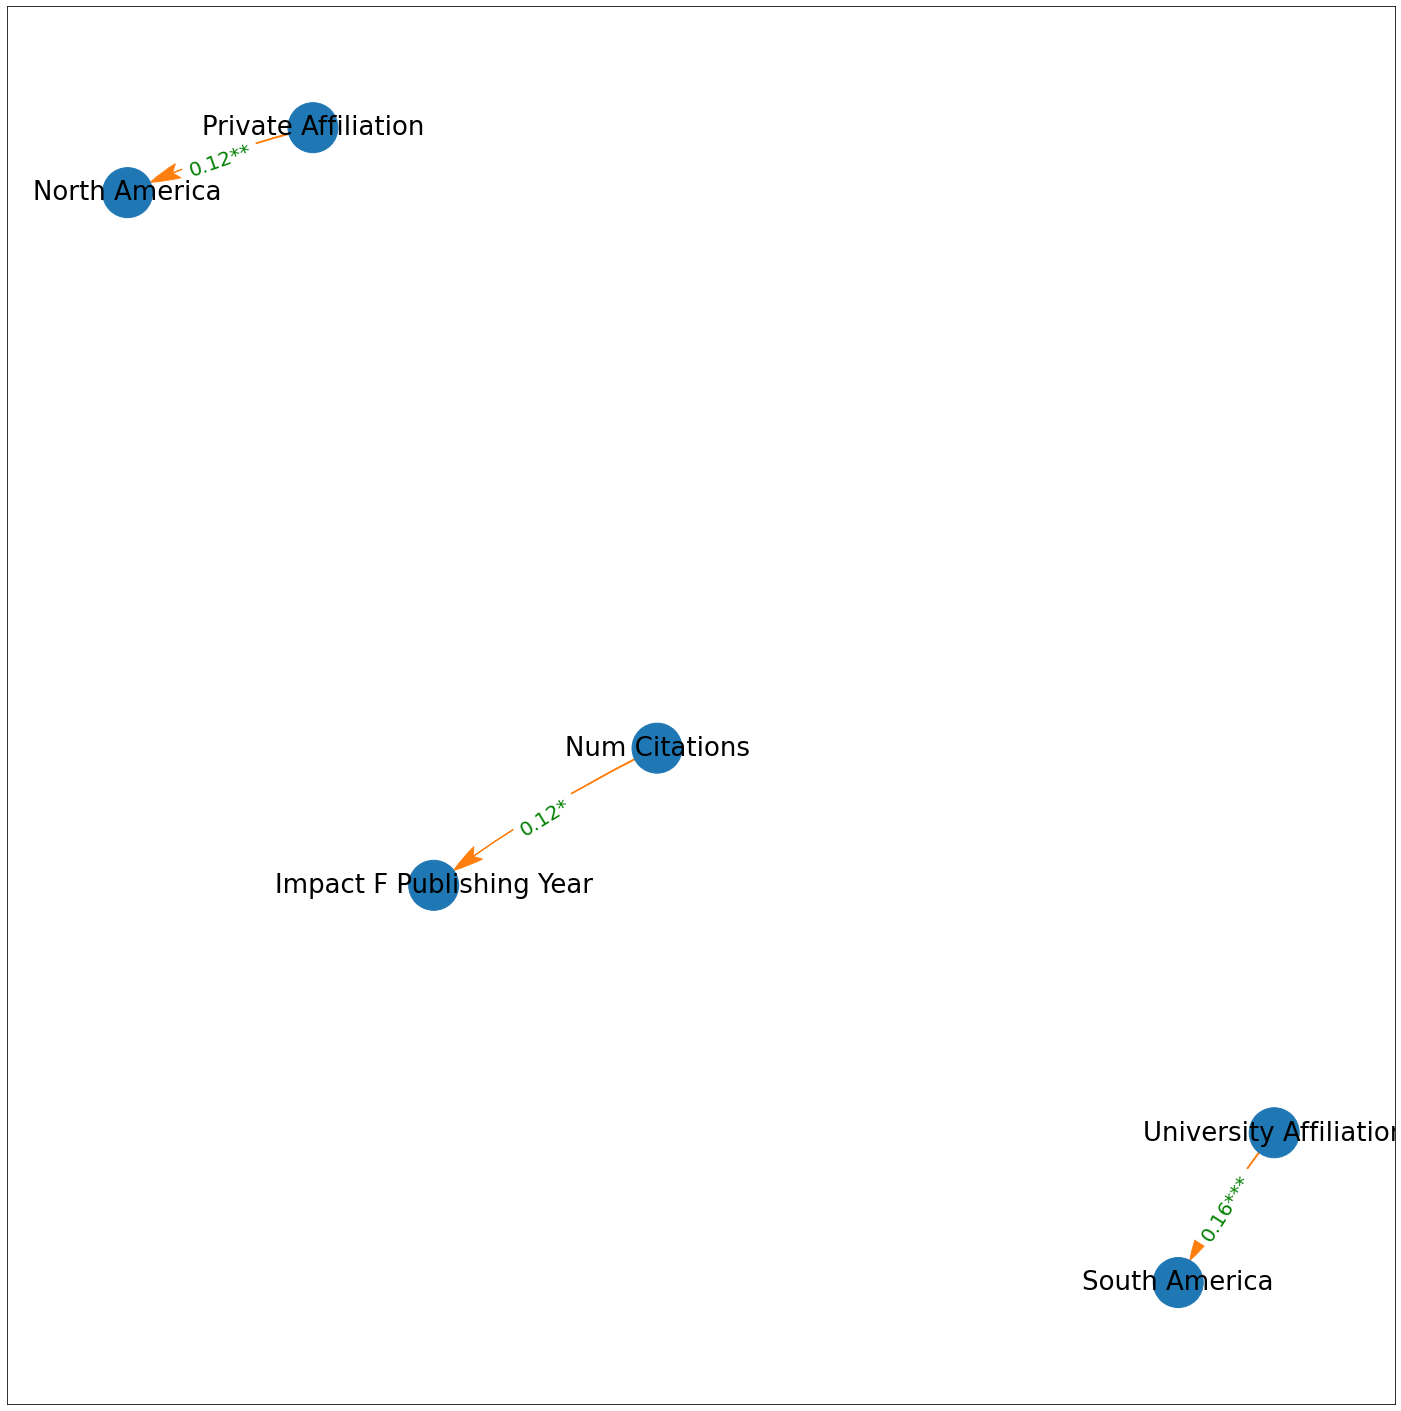

In [26]:
import pandas as pd
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import networkx as nx
import pingouin
from linearmodels.system import SUR

def graph_DAG(edges, 
              df, #df used to generate DAG
              #pp, #PdfPages() object 
              edge_labels = False, # Dictinary with numerical values
              sig_vals = [.05,.01,.001],
              title = ""):
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
        return edge_labels
    graph = nx.DiGraph()
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        df, 
                                        sig_vals=sig_vals) 
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]

    fig, ax = plt.subplots(figsize = (20,20))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)#, k = 5/(len(sig_corr.keys())**.5))

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = ax)
    
    plt.title(title, fontsize = 30)
#     print(edge_labels)
    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='C2')
    
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20)
    #pp.savefig(fig, bbox_inches = "tight")  
    plt.show()
    plt.close()

# https://pgmpy.org/structure_estimator/pc.html
def DAG(dag_data, 
        variant, #"orig", "stable", "parallel"
        ci_test, # ”chi_square”, "pearsonr"
        sig): #pvalue cutoff e.g 0.05, 0.1, 0.2
    c = PC(dag_data)
#     edges = c.skeleton_to_pdag(*c.build_skeleton())
    max_cond_vars = len(dag_data.keys()) - 2
    model = c.estimate(return_type = "pdag",variant= variant, 
                       significance_level = sig, 
                       max_cond_vars = max_cond_vars, 
                       ci_test = ci_test)
    edges = model.edges()
    
    return edges

graph_DAG(edges, data)

In [ ]:
def gen_pcorr(df, method = "pearson", sig = 0.01):

    pcs_dct = {}
    sig_corr_dct = {}
    for x in df.keys():
        sig_corr_dct[x] = []
        pcs_dct[x]={}
        for y in df.keys():
            # control variables
            # select variables that are not x or y
            other_vars = [z for z in df.keys() if z != y and z != x ]
            if x == y:
                # No need to calculate if the variable is itself
                pcs_dct[x][y] = 1
            else:
                pcs_dct[x][y] = df.partial_corr(x=x,y=y, covar=other_vars,
                                      method=method).round(3)
                if pcs_dct[x][y]["p-val"].values[0] < sig:
                    sig_corr_dct[x].append((y, pcs_dct[x][y]["r"].values[0]))

    return pcs_dct, sig_corr_dct

In [ ]:
pcs_dct, sig_corr_dct = gen_pcorr(data[keys].fillna(0), method = "pearson", sig = 0.01)

import statsmodels.api as sm
import numpy
residuals = {}
partial_corr = {}
reg_df = data[keys].dropna()[:-1]
for y_var in keys:
    X_vars = [x for x in keys if x != y_var]
    X= reg_df[X_vars]
    X["constant"] = 1
    y = reg_df[y_var]
    model = sm.OLS(y,X)
    results = model.fit()
    print(results.summary())
    predict = results.predict()
    reg_df["predict"] = predict
    residuals[y_var] = results.resid

for x in keys:
    partial_corr[x] = {}
    for y in keys:
        if x != y:
            Y = pd.DataFrame(residuals[y])
            X = pd.DataFrame(residuals[x])
            model = sm.OLS(Y,X)
            results = model.fit()
            print(results.rsquared, results.pvalues)
            
            # check if statsmodels is correctly calcualting the error term... May be negative
            partial_corr[x][y] = np.corrcoef(residuals[x], residuals[y])[0][1] * -1
            print(partial_corr[x][y])
            print(pcs_dct[x][y])
        else:
            partial_corr[x][y] = 1

In [ ]:
pd.DataFrame(partial_corr).sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True) 

In [ ]:
reg_df[keys].pcorr().sort_index(axis=0, ascending=True).sort_index(axis=1, ascending = True)